# <center><a href='https://colab.research.google.com/github/fortierq/itc1/blob/master/files/5_graph/3_traversal/labyrinth.ipynb'>Code : Génération et résolution de labyrinthe <img src=https://colab.research.google.com/assets/colab-badge.svg width=100></a></center>

## Génération d'un labyrinthe par parcours en profondeur

On souhaite construire un labyrinthe, sous la forme d'un graphe dont l'ensemble des sommets est $\{ (i, j) | 0 \leq i < n, 0 \leq j < p \}$ (une grille rectangulaire de taille $n \times p$), et où chaque sommet est adjacent à un ou plusieurs des $4$ sommets autour de lui.  
L'objectif est de trouver un chemin du sommet $(0, 0)$ (en bas à gauche) au sommet $(n - 1, p - 1)$ (en haut à droite).  

Pour générer un tel labyrinthe, on peut utiliser un parcours en profondeur sur une grille $n\times p$ (contenant toutes les arêtes possibles) et où on ne conserve que les arêtes visitées par ce parcours :

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import random

def generate_labyrinth(n, p):
    G = nx.Graph()
    G.add_nodes_from((i, j) for i in range(n) for j in range(p))
    visited = [[False]*p for _ in range(n)]
    def dfs(i, j):
        visited[i][j] = True
        neighbors = [(i+1, j), (i-1, j), (i, j+1), (i, j-1)]
        random.shuffle(neighbors)
        for x, y in neighbors:
            if 0 <= x < n and 0 <= y < p and not visited[x][y]:
                G.add_edge((i, j), (x, y))
                dfs(x, y)
    dfs(n - 1, 0)
    return G

def draw(G, **keywords):
    plt.clf()
    nx.draw(G, pos={p: p for p in G.nodes()}, node_size=20, **keywords)
    plt.show()

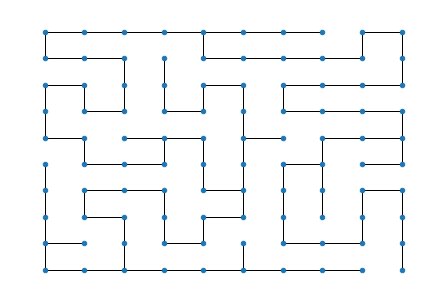

In [3]:
n = 10
G = generate_labyrinth(n, n)
draw(G)

## Résolution par parcours en profondeur

Pour trouver un chemin du sommet en bas à gauche au sommet en bas à droite, on peut utiliser un parcours (ici en profondeur) :

In [4]:
def solve_labyrinth(G, n):
    visited = [[False]*n for _ in range(n)]
    path = []
    for i,e in enumerate(G.edges):
        G.edges[e]['index'] = i
    def dfs(i, j):
        if i == n - 1 == j:
            return True
        visited[i][j] = True
        neighbors = [(i+1, j), (i-1, j), (i, j+1), (i, j-1)]
        random.shuffle(neighbors)
        for x, y in neighbors:
            if 0 <= x < n and 0 <= y < n and (x, y) in G[(i, j)] and not visited[x][y]:
                if dfs(x, y):
                    path.append(G[(i, j)][(x, y)]['index'])
                    return True
        return False
    dfs(0, 0)
    return path

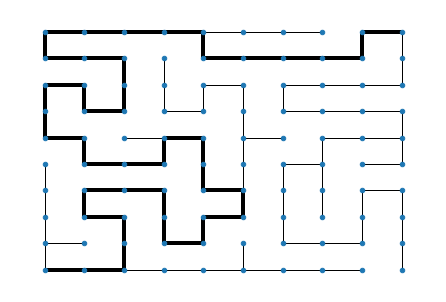

In [5]:
path = solve_labyrinth(G, n)
widths = [4 if i in path else 1 for i in range(len(G.edges))]
draw(G, width=widths)

## Animation de parcours du labyrinthe

Pour voir dans quel ordre sont considérées les arêtes, on peut utiliser la fonction d'animation suivante :

In [6]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.animation
from IPython.display import HTML

def anim_graph(G, widths):
    fig, ax = plt.subplots(figsize=(20,12))
    plt.close()
    def update(frame):
        ax.clear()
        nx.draw(G, ax=ax, pos={p: p for p in G.nodes()}, node_size=700, width=widths[frame])
    ani = matplotlib.animation.FuncAnimation(fig, update, frames=len(widths), interval=80)
    return HTML(ani.to_jshtml(default_mode="once"))

### Animation du parcours en profondeur

On affiche le parcours en profondeur en affichant en gras, à chaque étape, l'arête considérée :

In [7]:
def solve_labyrinth_dfs(G, n):
    widths = [1]*len(G.edges)
    visited = [[False]*n for _ in range(n)]
    frame_widths = []
    for i,e in enumerate(G.edges):
        G.edges[e]['index'] = i
    def dfs(i, j):
        if i == n - 1 == j:
            return True
        visited[i][j] = True
        neighbors = [(i+1, j), (i-1, j), (i, j+1), (i, j-1)]
        random.shuffle(neighbors)
        for x, y in neighbors:
            if 0 <= x < n and 0 <= y < n and (x, y) in G[(i, j)] and not visited[x][y]:
                widths[G[(i, j)][(x, y)]['index']] = 6
                frame_widths.append(widths.copy())
                if dfs(x, y):
                    return True
                widths[G[(i, j)][(x, y)]['index']] = 1
                frame_widths.append(widths.copy())
        return False
    dfs(0, 0)
    return frame_widths

In [8]:
anim_graph(G, solve_labyrinth_dfs(G, n))

### Animation du parcours en largeur

Et voici l'animation du parcours en largeur :

In [10]:
from collections import deque

def solve_labyrinth_bfs(G, n):
    widths = [1]*len(G.edges)
    visited = [[False]*n for _ in range(n)]
    frame_widths = []
    for i, e in enumerate(G.edges):
        G.edges[e]['index'] = i
    q = deque([(0, 0)])
    while len(q) > 0:
        i, j = q.pop()
        if i == n - 1 == j:
            break
        visited[i][j] = True
        neighbors = [(i+1, j), (i-1, j), (i, j+1), (i, j-1)]
        random.shuffle(neighbors)
        for x, y in neighbors:
            if 0 <= x < n and 0 <= y < n and (x, y) in G[(i, j)] and not visited[x][y]:
                widths[G[(i, j)][(x, y)]['index']] = 6
                frame_widths.append(widths.copy())
                q.appendleft((x, y))
    return frame_widths

anim_graph(G, solve_labyrinth_bfs(G, n))